In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [68]:
df=pd.read_csv('Cancer_dataset1.csv')
df.head(10)

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,843786,R,77,12.75,NaN,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,NaN
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1.0
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20.0


In [69]:
df.isnull().sum()

,0
id,0
outcome,0
time,0
mean_radius,4
mean_texture,4
mean_perimeter,0
mean_area,0
mean_smoothness,0
mean_compactness,0
mean_concavity,0


In [70]:
col=['mean_radius', 'lymph_node_status','mean_texture','worst_concavity']
df[col].head(10)

,mean_radius,lymph_node_status,mean_texture,worst_concavity
0,18.02,5.0,27.60,0.3140
1,17.99,2.0,10.38,0.7119
2,21.37,0.0,17.44,0.3414
3,11.42,0.0,20.38,0.6869
4,20.29,0.0,14.34,0.4000
5,12.75,0.0,NaN,0.5999
6,18.98,NaN,19.61,0.2990
7,13.71,10.0,20.83,0.2678
8,13.00,1.0,21.82,0.5390
9,12.46,20.0,24.04,1.1050


In [71]:
df[col]=df[col].fillna(0)
df.isnull().sum()

,0
id,0
outcome,0
time,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
mean_compactness,0
mean_concavity,0


1.
a. Consider the following numeric variables in the dataset: mean_radius, mean_texture,
mean_perimeter, mean_area, mean_smoothness, mean_compactness, mean_concavity and
mean_concave_points. Summarize the statistics of these variables into count, mean, standard
deviation, minimum, 25% percentile, 50% percentile, 75% percentile, and maximum.

In [72]:
cols=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points']
df_new=df[cols].to_numpy()
print(df_new[0:10])

[[1.802e+01 2.760e+01 1.175e+02 1.013e+03 9.489e-02 1.036e-01 1.086e-01
  7.055e-02]
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01]
 [2.137e+01 1.744e+01 1.375e+02 1.373e+03 8.836e-02 1.189e-01 1.255e-01
  8.180e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
  1.043e-01]
 [1.275e+01 0.000e+00 8.460e+01 5.027e+02 1.189e-01 1.569e-01 1.664e-01
  7.666e-02]
 [1.898e+01 1.961e+01 1.244e+02 1.112e+03 9.087e-02 1.237e-01 1.213e-01
  8.910e-02]
 [1.371e+01 2.083e+01 9.020e+01 5.779e+02 1.189e-01 1.645e-01 9.366e-02
  5.985e-02]
 [1.300e+01 2.182e+01 8.750e+01 5.198e+02 1.273e-01 1.932e-01 1.859e-01
  9.353e-02]
 [1.246e+01 2.404e+01 8.397e+01 4.759e+02 1.186e-01 2.396e-01 2.273e-01
  8.543e-02]]


In [73]:
df[cols].describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,17.060303,21.868131,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776
std,3.974541,5.280374,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877
min,0.000000,0.000000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310
25%,14.890000,19.247500,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670
50%,17.195000,21.660000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075
75%,19.550000,24.517500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925
max,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200


In [74]:
count = df[cols].count()
mean = df[cols].mean()
std = df[cols].std()
min = df[cols].min()
per_25 = df[cols].quantile(0.25)
per_50 = df[cols].quantile(0.50)
per_75 = df[cols].quantile(0.75)
max = df[cols].max()


datafr=pd.DataFrame({'count':count, 'mean':mean, 'std':std, 'min':min, '25%':per_25, '50%':per_50, '75%':per_75, 'max':max})
datafr

,count,mean,std,min,25%,50%,75%,max
mean_radius,198,17.060303,3.974541,0.00000,14.89000,17.195000,19.550000,27.2200
mean_texture,198,21.868131,5.280374,0.00000,19.24750,21.660000,24.517500,39.2800
mean_perimeter,198,114.856566,21.383402,71.90000,98.16000,113.700000,129.650000,182.1000
mean_area,198,970.040909,352.149215,361.60000,702.52500,929.100000,1193.500000,2250.0000
mean_smoothness,198,0.102681,0.012522,0.07497,0.09390,0.101900,0.110975,0.1447
mean_compactness,198,0.142648,0.049898,0.04605,0.11020,0.131750,0.172200,0.3114
mean_concavity,198,0.156243,0.070572,0.02398,0.10685,0.151350,0.200500,0.4268
mean_concave_points,198,0.086776,0.033877,0.02031,0.06367,0.086075,0.103925,0.2012


b. Consider the categorical variable “outcome” in the dataset. Summarize the statistics of variable
into count, unique value, top value, and frequency of top value

In [75]:
count=df['outcome'].count()
unique=df['outcome'].unique()
top_value=df['outcome'].value_counts().index[0]
freq_top=df['outcome'].value_counts()[top_value]

print('Count:',count)
print('Unique:',unique)
print('Top value:',top_value)
print('Frequency top value:',freq_top)

Count: 198
Unique: ['N' 'R']
Top value: N
Frequency top value: 151


c. Is there a way to encode outcome variable from categorical to numerical data type? If so, how
would you do that?

Yes, we can do label encoding. This type has been choosen instead of others like one hot encoding or frequency encoding or binary because there are only 2 unique values(N and R). The label encoding will map 0 and 1 to the unique values if N is given 0 then R will be 1.

In [76]:
labels={'N':0, 'R': 1}
df['outcome']=df['outcome'].map(labels)
print(df['outcome'])

0      0
1      0
2      0
3      0
4      1
      ..
193    0
194    0
195    0
196    1
197    0
Name: outcome, Length: 198, dtype: int64


d. Do you think there are any redundant features present in the dataset? If so, explain how
removing it won't impact the analysis. Also, based on the experiments so far, were there any
interesting observations with respect to the variables?


In [77]:
df_encode=df.var()
print(df_encode)
df_encode=df.corr()
print(df_encode)

id                         8.346467e+12
outcome                    1.819464e-01
time                       1.187689e+03
mean_radius                1.579698e+01
mean_texture               2.788235e+01
mean_perimeter             4.572499e+02
mean_area                  1.240091e+05
mean_smoothness            1.568113e-04
mean_compactness           2.489771e-03
mean_concavity             4.980444e-03
mean_concave_points        1.147626e-03
mean_symmetry              7.527829e-04
mean_fractal_dimension     5.241079e-05
se_radius                  9.616960e-02
se_texture                 2.771674e-01
se_perimeter               4.814196e+00
se_area                    2.302297e+03
se_smoothness              8.846280e-06
se_compactness             3.102153e-04
se_concavity               4.355033e-04
se_concave_points          3.029696e-05
se_symmetry                9.174273e-05
se_fractal_dimension       3.755244e-06
worst_radius               1.800303e+01
worst_texture              3.621364e+01


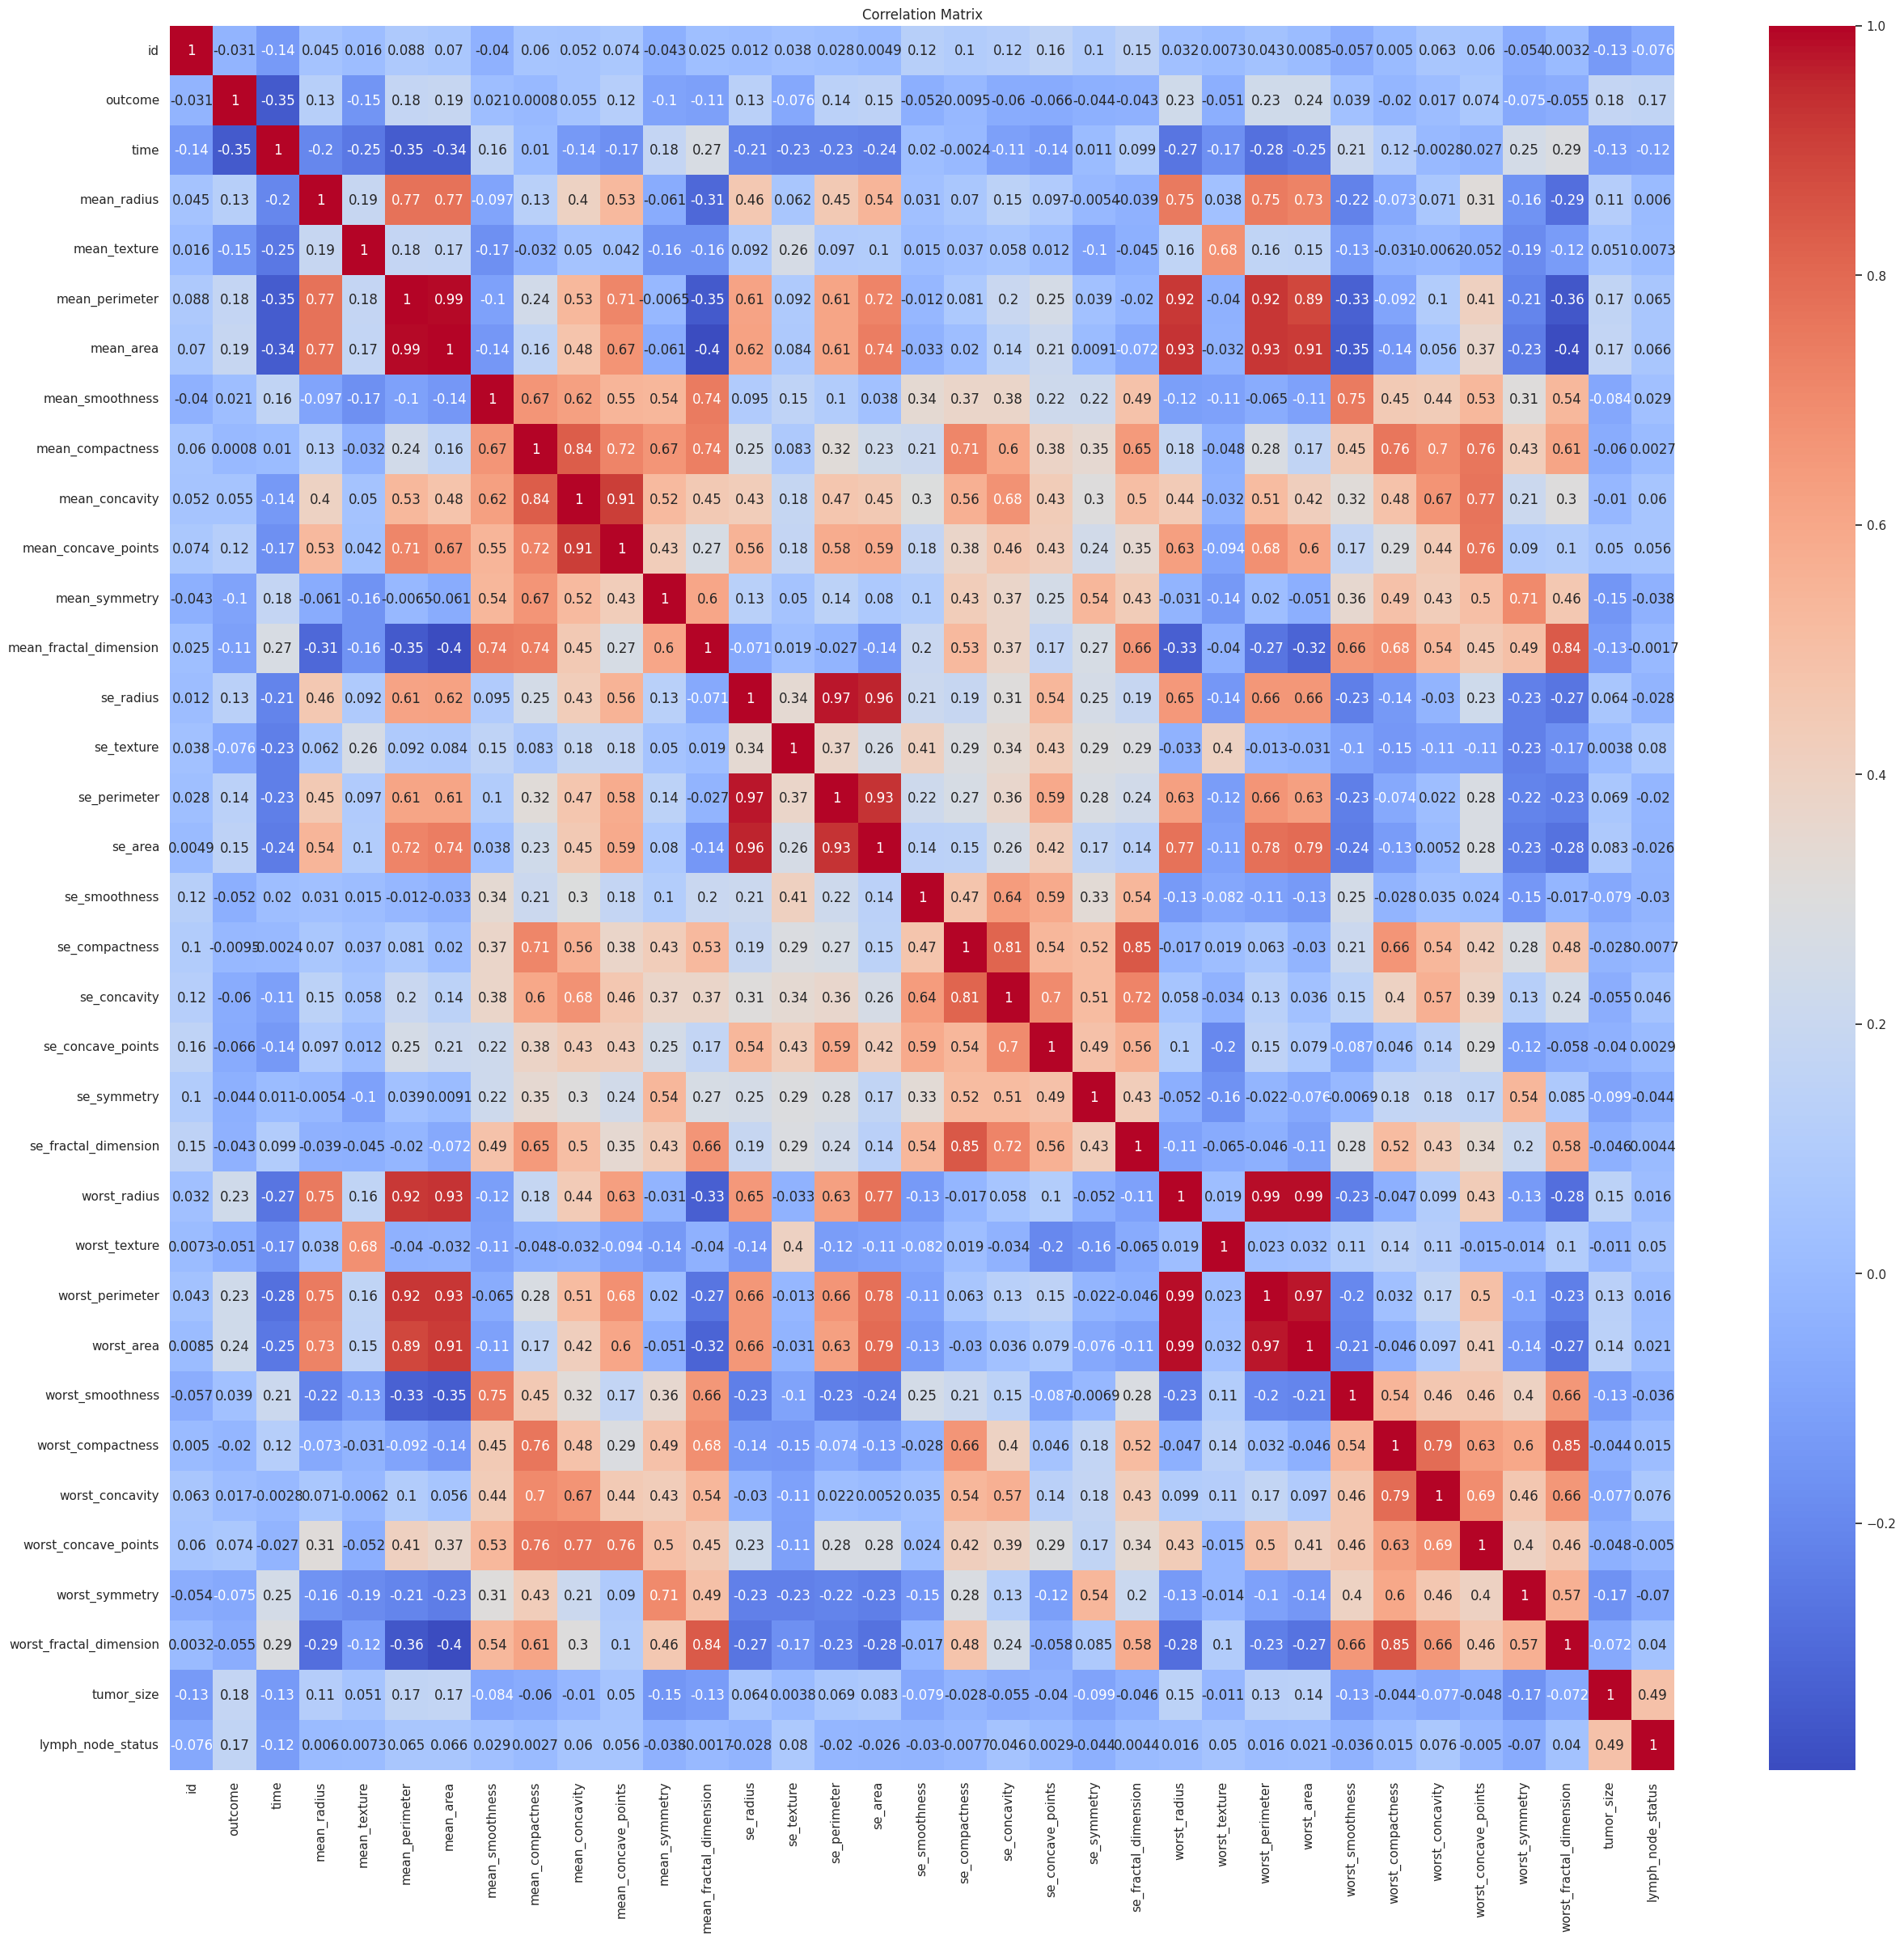

In [78]:
plt.figure(figsize=(30, 28))
sns.heatmap(df_encode, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [79]:
df_encode=df.T.duplicated()
print(df_encode)

id                         False
outcome                    False
time                       False
mean_radius                False
mean_texture               False
mean_perimeter             False
mean_area                  False
mean_smoothness            False
mean_compactness           False
mean_concavity             False
mean_concave_points        False
mean_symmetry              False
mean_fractal_dimension     False
se_radius                  False
se_texture                 False
se_perimeter               False
se_area                    False
se_smoothness              False
se_compactness             False
se_concavity               False
se_concave_points          False
se_symmetry                False
se_fractal_dimension       False
worst_radius               False
worst_texture              False
worst_perimeter            False
worst_area                 False
worst_smoothness           False
worst_compactness          False
worst_concavity            False
worst_conc

There are some size related features that are highly correlated.
They are:
1.   mean_area - mean_perimeter
2.   worst_area - worst_perimeter
3.   se_perimeter - se_area
4.   worst_radius - worst_area and worst_perimeter

From this observation we can see perimeter and area are obtained using the radius. So removing these might not affect the analysis at a greater extent. For all these the radius and other two are highly corellated in all therr mean, se and worst sizes but i have given the maximum two pairs. If the pairs are area and perimeter if the analyisis focus on the outer or boundary go with perimeter if the analysis on surface area or mass then go with the area.


What is the correlation between mean_perimeter and se_perimeter?

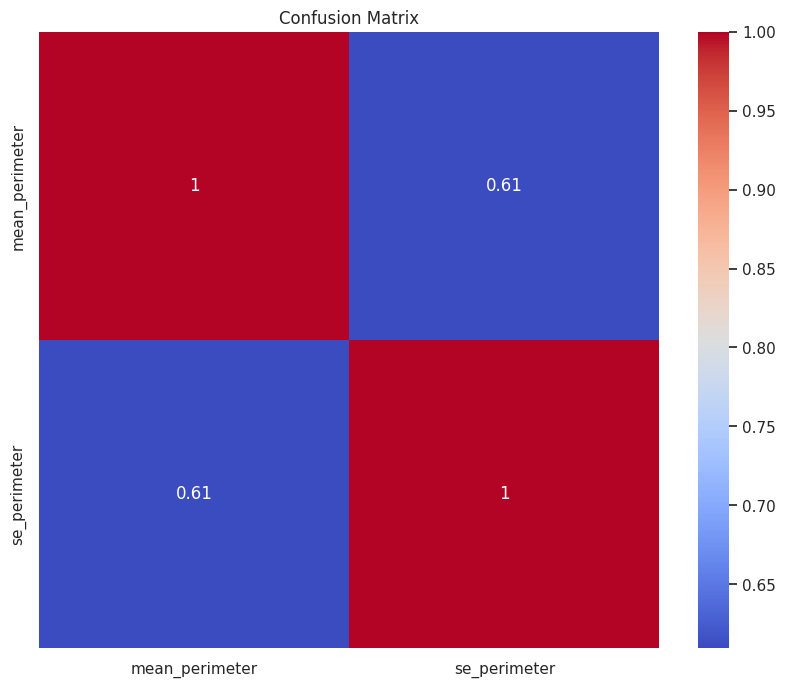

In [80]:
columns=['mean_perimeter','se_perimeter']
df_cors=df[columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_cors, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

If the value is between 0.5 and 0.7 they are indicated as moderaterly corellated but this doesnot affect the analysis.

2. Logistic Regression with
One Variable (20 points)
(a) Can you map the likelihood of breast cancer recurrence (outcome) based on "mean_area” feature
from the dataset?

In [81]:
X=df['mean_area']
Y=df['outcome']
X=np.array(X)
Y=np.array(Y)
print(X.shape, Y.shape)
sp=len(X)
index=np.arange(sp)
np.random.seed(27)
np.random.shuffle(index)

split=int(0.8*sp)
X_train=X[index[ :split]]
Y_train=Y[index[: split]]
X_test=X[index[split: ]]
Y_test=Y[index[split: ]]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(198,) (198,)
(158,) (158,)
(40,) (40,)


In [82]:
def sigmoid(z):
   sigm=1/(1+(np.exp(-z)))
   return sigm

In [83]:
print(sigmoid(2))

0.8807970779778823


In [84]:
def costfunct(x, y, w, b):
    m = x.shape[0]
    cost = 0
    epsilon = 1e-10  # Avoid log(0) by adding a small epsilon
    for i in range(m):
        z = x[i] * w + b
        sigm = sigmoid(z)
        cost += -y[i] * np.log(sigm+epsilon) - (1 - y[i]) * np.log(1 - sigm+epsilon)
    total_cost = (1 / m) * cost
    return total_cost


In [85]:
m = X_train.shape
n=1
# Compute and display cost with w initialized to zeroes
initial_w = 0.
initial_b = 0.
cost = costfunct(X_train, Y_train, initial_w, initial_b)
print(cost)

0.6931471803599438


In [86]:
def gradient_des_dj(x, y, w, b):
    """Compute the gradient of the cost function"""
    m = x.shape[0]
    dw = 0.0
    db = 0.0
    for i in range(m):
        z = sigmoid(x[i] * w + b)
        err = z - y[i]
        dw += err * x[i]  # Use x[i] because we only have one feature
        db += err
    dw /= m
    db /= m
    return dw, db

In [87]:

def gradient_descent(x, y, gradient_des, cost_fun, iterators, learning_rate):
    """Gradient descent optimization"""
    tolerance = 1e-6
    w = 0.01  # Start with a small random initialization
    b = 0.0
    prev_loss = float('inf')
    J_history = []

    for i in range(iterators):
        dw, db = gradient_des(x, y, w, b)

        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db

        # Calculate cost
        cost = cost_fun(x, y, w, b)
        J_history.append(cost)

        if abs(prev_loss - cost) < tolerance:
            print(f"Convergence reached at iteration {i + 1}")
            break
        prev_loss = cost

        # Print the cost every 10% of the iterations
        if i % math.ceil(iterators / 10) == 0 or i == (iterators - 1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w, b

In [88]:

# Train the model
w, b = gradient_descent(X_train, Y_train, gradient_des_dj, costfunct, iterators=10000, learning_rate=0.1)
print('w, b: ' + str(w) + ', ' + str(b))
# Calculate the linear combination of inputs and weights
z = X_test * w + b

predict_y = sigmoid(z)

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = (predict_y >= 0.7).astype(int)

print("Predicted probabilities:", predict_y)
print("Binary predictions:", binary_predictions)


Iteration    0: Cost     5.68
Convergence reached at iteration 2
w, b: -44.02277102045417, -0.05052107891231837
Predicted probabilities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Binary predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [89]:
# Ensure you are calculating predictions for the entire X_test
z_test = np.dot(X_test, w) + b  # Using your model parameters
predict_y_test = sigmoid(z_test)
binary_predictions = (predict_y_test >= 0.7).astype(int)

# Ensure the sizes of Y_test and binary_predictions match before passing them to classification_report
print(len(Y_test), len(binary_predictions))  # Should match

def confusion_matrix(true_labels, predicted_labels):


    TP=np.sum((true_labels ==1) & (predicted_labels ==1))
    TN =np.sum((true_labels ==0) & (predicted_labels ==0))
    FP =np.sum((true_labels == 0) & (predicted_labels ==1))
    FN=np.sum((true_labels ==1) & (predicted_labels ==0))

    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)

print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

#Classification report

precision=TP/(TP+FP)
recall=TP/(TP+FN)
f1=2*(precision*recall)/(precision+recall)
accuracy=((TP+TN)/(TP+TN+FN+FP))
precision_z=TN/(TN+FN)
precision_o=TP/(TP+FP)
rec_z=TN/(TN+FP)
rec_o=TP/(TP+FN)
f1_z=2*(precision_z*rec_z)/(precision_z+rec_z)
f1_o=2*(precision_o*rec_o)/(precision_o+rec_o)
if (math.isnan(precision) or math.isnan(recall) or math.isnan(f1) or
    math.isnan(precision_o) or math.isnan(f1_o)):
    precision = 0.0
    recall = 0.0
    f1 = 0.0
    precision_o=0
    f1_o=0

macro_avg_precision=(precision_z+precision_o)/2
macro_avg_recall=(rec_z+rec_o)/2
macro_avg_f1=(f1_z+f1_o)/2
weighted_avg_precision=(precision_z*TN + precision_o*FN)/(FN+TN)
weighted_avg_recall=(rec_z*TN + rec_o*FN)/(FN+TN)
weighted_avg_f1=(f1_z*TN + f1_o*FN)/(FN+TN)

class_rep={'Metric': ['Precision_1', 'Recall_1', 'F1-Score_1', 'Precision_0', 'Recall_0', 'F1-Score_0' ,'Accuracy', 'Macro Average Precision', 'Macro Average Recall', 'Macro Average F1 Score', 'Weighted Average precision', 'Weighted average Recall', 'Weighted Average F1']
                  , 'Value': [round(x,2) for x in [precision, recall, f1, precision_z, rec_z, f1_z, accuracy, macro_avg_precision, macro_avg_recall, macro_avg_f1, weighted_avg_precision, weighted_avg_recall, weighted_avg_f1]]}

class_rep_metric=pd.DataFrame(class_rep)
print(class_rep_metric)

40 40
Confusion Matrix:
 TP: 0, TN: 32, FP: 0, FN: 8
                        Metric  Value
0                  Precision_1   0.00
1                     Recall_1   0.00
2                   F1-Score_1   0.00
3                  Precision_0   0.80
4                     Recall_0   1.00
5                   F1-Score_0   0.89
6                     Accuracy   0.80
7      Macro Average Precision   0.40
8         Macro Average Recall   0.50
9       Macro Average F1 Score   0.44
10  Weighted Average precision   0.64
11     Weighted average Recall   0.80
12         Weighted Average F1   0.71


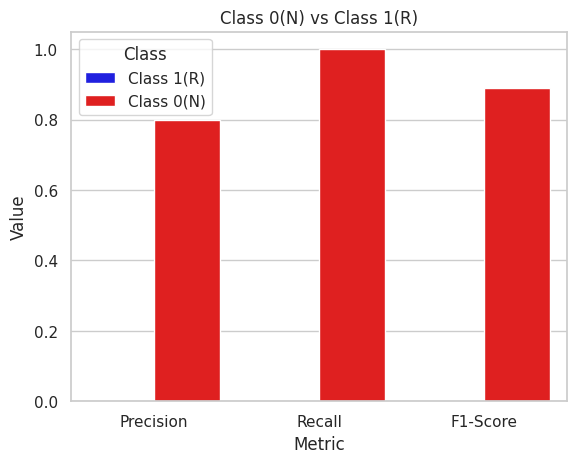

In [90]:
metrics=['Precision', 'Recall', 'F1-Score']
model_1=[precision, recall, f1]
model_2=[precision_z, rec_z, f1_z]

data=pd.DataFrame({
    "Metrics": metrics,
    "Class 1(R)": model_1,
    "Class 0(N)": model_2

})
data_melted=data.melt(id_vars="Metrics", var_name="Class", value_name="Values" )
sns.set(style="whitegrid")
sns.barplot(x="Metrics", y="Values", hue="Class", data=data_melted, palette=["blue", "red"])

plt.title("Class 0(N) vs Class 1(R)")
plt.ylabel("Value")
plt.xlabel("Metric")
plt.show()


-44.02277102045417 -0.05052107891231837


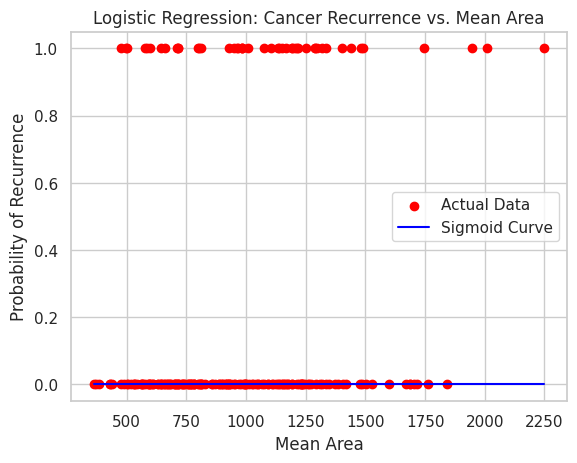

In [91]:
X = df['mean_area'].values
Y = df['outcome'].values

print(w, b)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)


Y_prob = sigmoid(np.dot(X_range, w) + b)

# Plotting the actual data points and sigmoid curve
plt.scatter(X, Y, color='red', label='Actual Data')
plt.plot(X_range, Y_prob, color='blue', label='Sigmoid Curve')
plt.xlabel('Mean Area')
plt.ylabel('Probability of Recurrence')
plt.legend()
plt.title('Logistic Regression: Cancer Recurrence vs. Mean Area')
plt.show()


3.	Logistic Regression with Multiple Variables (50 points)   
   
a)	Design a Logistic Regression model to predict breast cancer recurrence (outcome) using the following 12 variables from the dataset as input features:   
   
Features:  mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness, mean_compactness, mean_concavity, mean_concave_points, mean_fractal_dimension, se_perimeter, se_texture, se_area   


In [92]:
cols=['mean_radius', 'mean_texture',
      'mean_perimeter', 'mean_area',
      'mean_smoothness', 'mean_compactness',
      'mean_concavity', 'mean_concave_points',
      'mean_fractal_dimension', 'se_perimeter',
      'se_texture', 'se_area']

In [93]:
X=df[cols]
Y=df['outcome']
X.shape, Y.shape

X=X.to_numpy()
Y=Y.to_numpy()
print(X.shape, Y.shape)
print(X[0:10])

(198, 12) (198,)
[[1.802e+01 2.760e+01 1.175e+02 1.013e+03 9.489e-02 1.036e-01 1.086e-01
  7.055e-02 6.333e-02 3.972e+00 1.890e+00 7.155e+01]
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 7.871e-02 8.589e+00 9.053e-01 1.534e+02]
 [2.137e+01 1.744e+01 1.375e+02 1.373e+03 8.836e-02 1.189e-01 1.255e-01
  8.180e-02 6.010e-02 3.928e+00 6.105e-01 8.215e+01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 9.744e-02 3.445e+00 1.156e+00 2.723e+01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
  1.043e-01 5.883e-02 5.438e+00 7.813e-01 9.444e+01]
 [1.275e+01 0.000e+00 8.460e+01 5.027e+02 1.189e-01 1.569e-01 1.664e-01
  7.666e-02 7.164e-02 2.999e+00 7.402e-01 3.085e+01]
 [1.898e+01 1.961e+01 1.244e+02 1.112e+03 9.087e-02 1.237e-01 1.213e-01
  8.910e-02 5.767e-02 3.592e+00 8.434e-01 6.121e+01]
 [1.371e+01 2.083e+01 9.020e+01 5.779e+02 1.189e-01 1.645e-01 9.366e-02
  5.985e-02 7.451e-02 3.856e+00 1.37

In [94]:
leng=len(X)
index=np.arange(leng)
split=int(0.75*leng)
X_train=X[index[:split]]
Y_train=Y[index[:split]]
X_test=X[index[split:]]
Y_test=Y[index[split:]]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(148, 12) (148,)
(50, 12) (50,)


In [95]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [96]:
def costfunct(x, y, w, b):
    m = x.shape[0]
    cost = 0
    epsi = 1e-10  # Prevent log(0)
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigm = sigmoid(z)
        cost += -y[i] * np.log(sigm + epsi) - (1 - y[i]) * np.log(1 - sigm + epsi)
    return cost / m

In [97]:
def gradient_dj(x, y, w, b):
    m, n = x.shape
    dw = np.zeros(n)
    db = 0.0
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigm = sigmoid(z)
        error = sigm - y[i]  # Correct error calculation
        for j in range(n):
            dw[j] += error * x[i, j]
        db += error
    dw /= m
    db /= m
    return dw, db


In [98]:
def gradient_descent(x, y, gradient_dj, costfunct, iterators, learning_rate):
    tolerance = 1e-6
    prev_loss = float('inf')
    n = x.shape[1]
    w = np.zeros(n)
    b = 0.0
    loss_history=[]
    for i in range(iterators):
        dw, db = gradient_dj(x, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db

        loss = costfunct(x, y, w, b)
        loss_history.append(loss)
        if abs(prev_loss - loss) < tolerance:
            print(f"Convergence at the {i+1}th iteration")
            break
        prev_loss = loss

    #track loss history
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

    return w, b  # Move return outside the loop

In [99]:
def evaluate_accuracy(X, Y, w, b):
    z = np.dot(X, w) + b
    predictions = (sigmoid(z) >= 0.65).astype(int)  # Convert probabilities to binary (0 or 1)
    return np.mean(predictions == Y)  # Calculate accuracy


Convergence at the 4th iteration


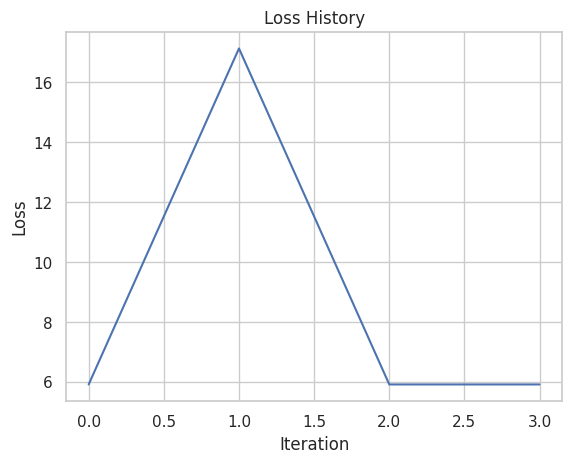

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Training set accuracy: 0.7432432432432432
Test Accuracy for Logisic regression with 12 features:  0.82


In [100]:
w, b = gradient_descent(X_train, Y_train, gradient_dj, costfunct, iterators=10000, learning_rate=0.001)
z = np.dot(X_test, w) + b
predict_y = sigmoid(z)
binary_predictions = (predict_y >= 0.65).astype(int)

print(binary_predictions)
print("Training set accuracy:",evaluate_accuracy(X_train, Y_train, w, b))
print("Test Accuracy for Logisic regression with 12 features: ", evaluate_accuracy(X_test, Y_test, w, b))

In [101]:
z_test = np.dot(X_test, w) + b  # Using your model parameters
predict_y_test = sigmoid(z_test)
binary_predictions = (predict_y_test >= 0.65).astype(int)

print(len(Y_test), len(binary_predictions))  # Should match

def confusion_matrix(true_labels, predicted_labels):
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)
print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

# accuracy formula
accuracy = (TP + TN) / (TP + TN + FN + FP)

# Prevent division by zero
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

precision_z = TN / (TN + FN) if (TN + FN) > 0 else 0.0
precision_o = TP / (TP + FP) if (TP + FP) > 0 else 0.0
rec_z = TN / (TN + FP) if (TN + FP) > 0 else 0.0
rec_o = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1_z = 2 * (precision_z * rec_z) / (precision_z + rec_z) if (precision_z + rec_z) > 0 else 0.0
f1_o = 2 * (precision_o * rec_o) / (precision_o + rec_o) if (precision_o + rec_o) > 0 else 0.0
# macro averages
macro_avg_precision = (precision_z + precision_o) / 2
macro_avg_recall = (rec_z + rec_o) / 2
macro_avg_f1 = (f1_z + f1_o) / 2

# weighted averages
total_samples = TP + TN + FP + FN
weighted_avg_precision = (precision_z * (TN + FP) + precision_o * (TP + FN)) / total_samples
weighted_avg_recall = (rec_z * (TN + FP) + rec_o * (TP + FN)) / total_samples
weighted_avg_f1 = (f1_z * (TN + FP) + f1_o * (TP + FN)) / total_samples

# Create classification report dataframe
class_rep = {
    'Metric': [
        'Precision_1', 'Recall_1', 'F1-Score_1',
        'Precision_0', 'Recall_0', 'F1-Score_0',
        'Accuracy', 'Macro Average Precision', 'Macro Average Recall',
        'Macro Average F1 Score', 'Weighted Average Precision',
        'Weighted Average Recall', 'Weighted Average F1'
    ],
    'Value': [round(x, 2) for x in [
        precision, recall, f1, precision_z, rec_z, f1_z, accuracy,
        macro_avg_precision, macro_avg_recall, macro_avg_f1,
        weighted_avg_precision, weighted_avg_recall, weighted_avg_f1
    ]]
}

class_rep_metric = pd.DataFrame(class_rep)
print("Classification Report for Logistic Regression Before Regularization and Feature Scaling")
print(class_rep_metric)


50 50
Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
Classification Report for Logistic Regression Before Regularization and Feature Scaling
                        Metric  Value
0                  Precision_1   0.00
1                     Recall_1   0.00
2                   F1-Score_1   0.00
3                  Precision_0   0.82
4                     Recall_0   1.00
5                   F1-Score_0   0.90
6                     Accuracy   0.82
7      Macro Average Precision   0.41
8         Macro Average Recall   0.50
9       Macro Average F1 Score   0.45
10  Weighted Average Precision   0.67
11     Weighted Average Recall   0.82
12         Weighted Average F1   0.74


In [102]:
print(X_train.shape[1])

12


b)	Design a Logistic Regression model to predict breast cancer recurrence (outcome) using forward selection to select the most significant variables in the dataset as input features. Which subset of features gave you the best performance? What are your thoughts on these features getting selected? (Use 12 features from 3a as Input features)   


In [103]:
def forward_step():
  selected_columns = []  # Start with an empty list of selected features
  remaining_features = list(range(X_train.shape[1]))  # List of all feature indices
  current_acc=-float('inf')
  # n=X_train.shape[1]
  # Stepwise regression
  for i in range(X_train.shape[1]):
      best_acc = current_acc
      best_feature = None
      best_w, best_b = None, None

      # Try adding each remaining feature
      for feature in remaining_features:
          new_features = selected_columns + [feature]  # Add current feature to selected features
          print(new_features)
          model = X_train[:, new_features]  # Select the columns for the current model



          w,b = gradient_descent(model, Y_train, gradient_dj, costfunct, iterators=10000, learning_rate=0.001)

          X_subset = X_train[:, new_features]
          model_test=X_test[:, new_features]
          acc = evaluate_accuracy(X_subset, Y_train, w, b)
          acc_test=evaluate_accuracy(model_test, Y_test, w, b)

          z=np.dot(model_test, w)+b
          predict_y=sigmoid(z)
          binary_predictions=(predict_y>=0.65).astype(int)
          conf_mat=confusion_matrix(Y_test, binary_predictions)
          print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

          # Keep the best feature based on ACC
          if acc > best_acc:
              best_acc = acc
              best_test_acc=acc_test
              best_feature = feature
              best_model = model
              best_w, best_b = w,b

      # If ACC improves, add the feature and update remaining features
      if best_feature is not None:
          selected_columns.append(best_feature)  # Add the best feature to selected
          remaining_features.remove(best_feature)  # Remove the best feature from remaining
          current_acc = best_acc
          print(f"Iteration {i+1}: Added feature {best_feature}, ACC: {best_acc}")
          print(f"Best test Accuaracy: {best_test_acc}")
      else:
          print(f"ACC value obtained: {acc} which is smaller than the best Acc obtained before so the loop stoped")
          break


  return selected_columns, best_acc, best_test_acc, TP, TN, FP, FN


[0]
Convergence at the 83th iteration


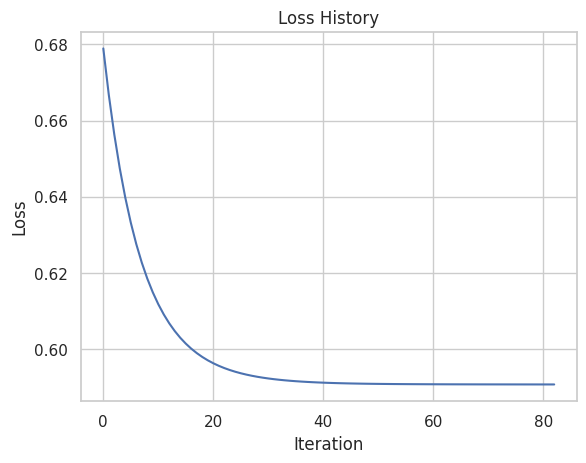

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[1]
Convergence at the 55th iteration


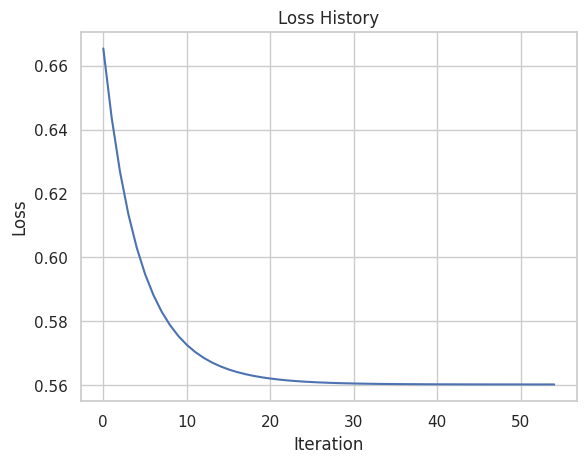

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[2]


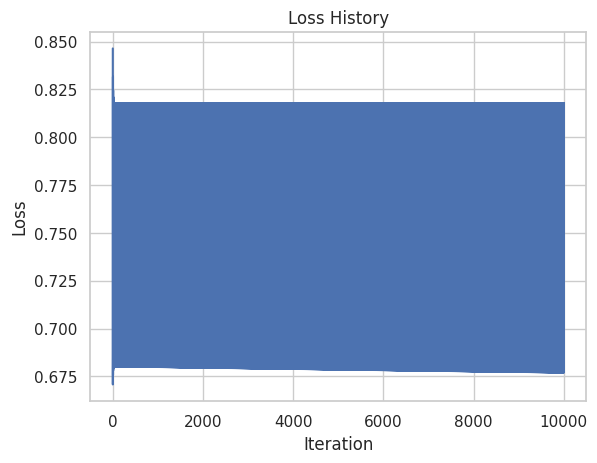

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[3]
Convergence at the 4th iteration


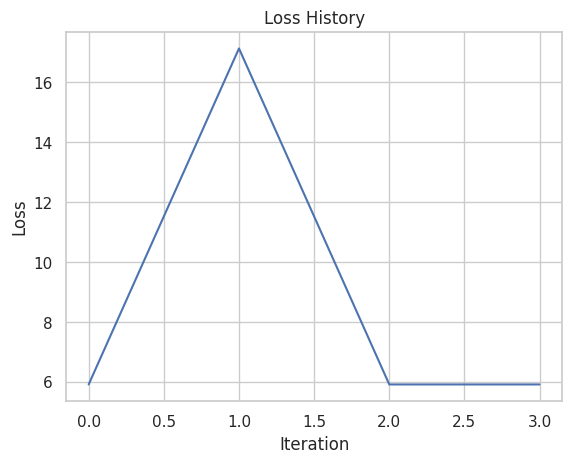

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[4]
Convergence at the 8952th iteration


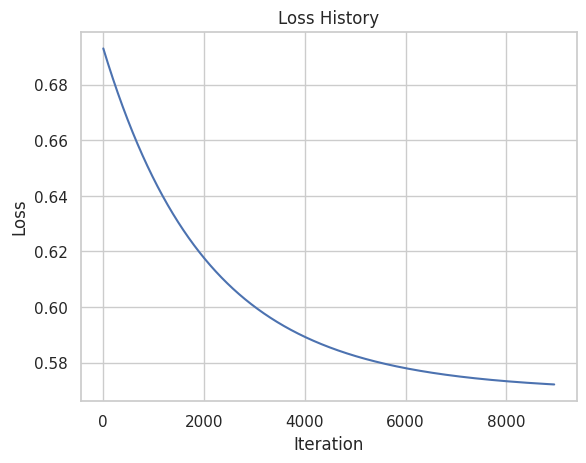

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[5]
Convergence at the 8886th iteration


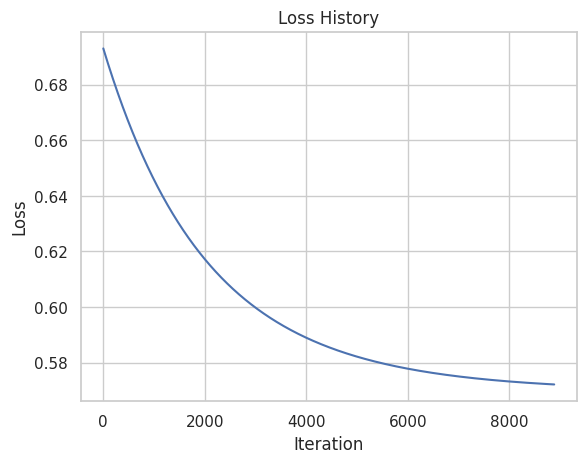

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[6]
Convergence at the 8870th iteration


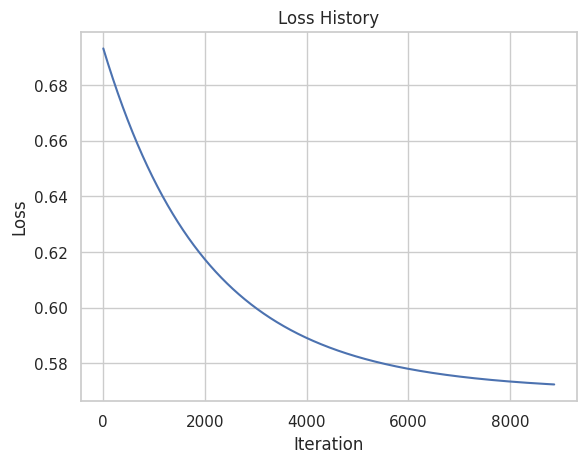

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[7]
Convergence at the 8979th iteration


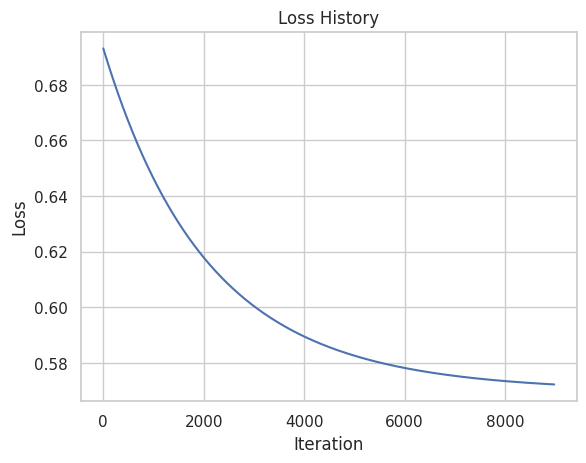

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[8]
Convergence at the 8997th iteration


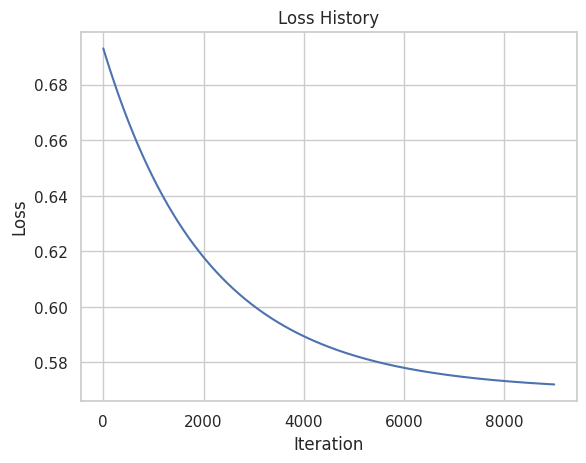

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[9]


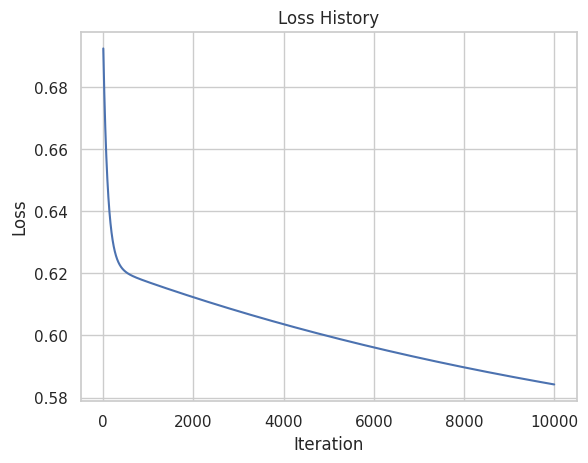

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[10]
Convergence at the 4587th iteration


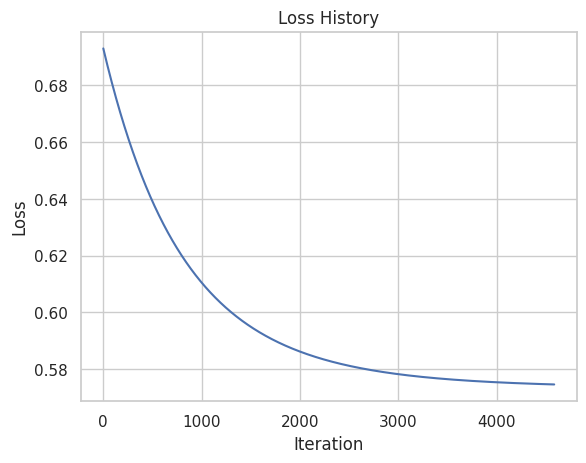

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[11]


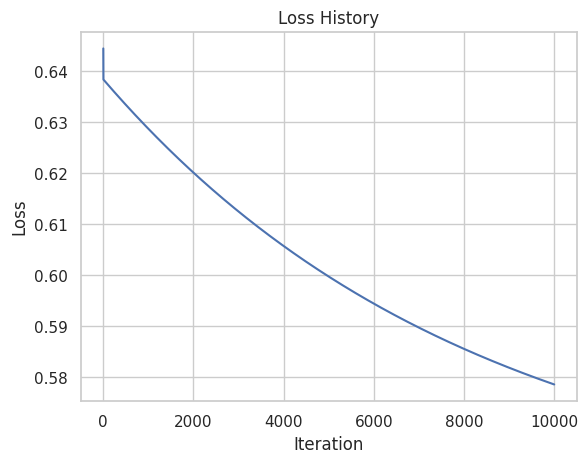

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
Iteration 1: Added feature 0, ACC: 0.7432432432432432
Best test Accuaracy: 0.82
[0, 1]
Convergence at the 940th iteration


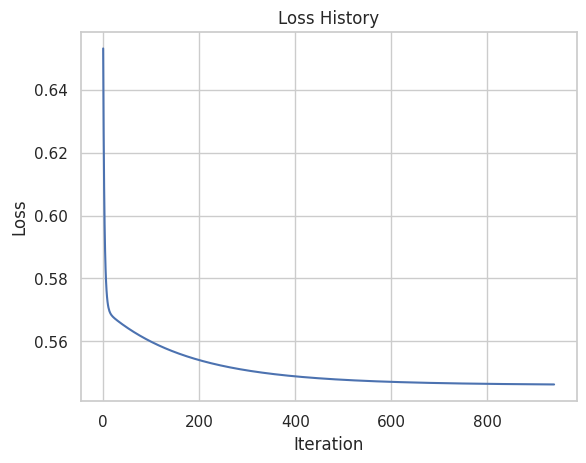

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 2]


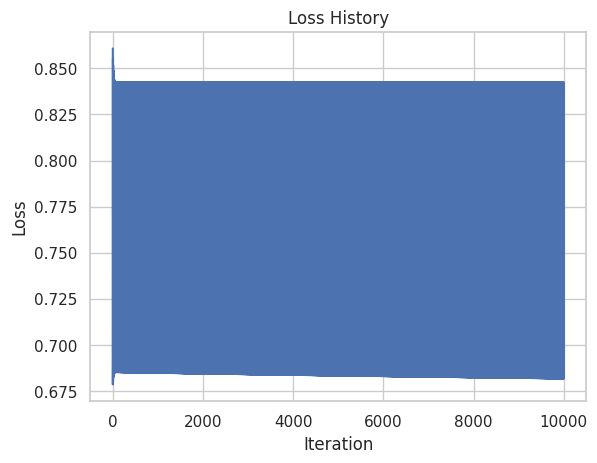

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 3]
Convergence at the 4th iteration


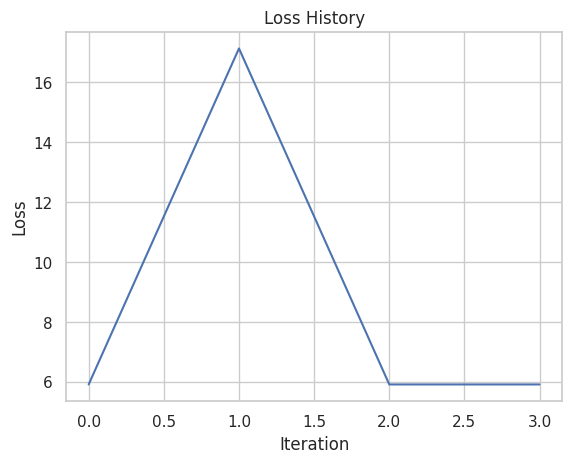

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 4]
Convergence at the 83th iteration


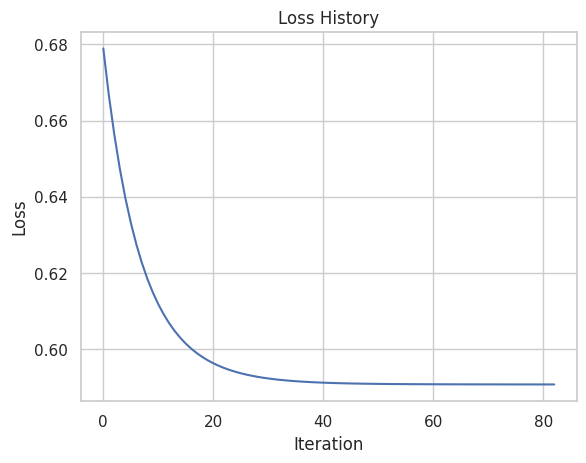

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 5]
Convergence at the 83th iteration


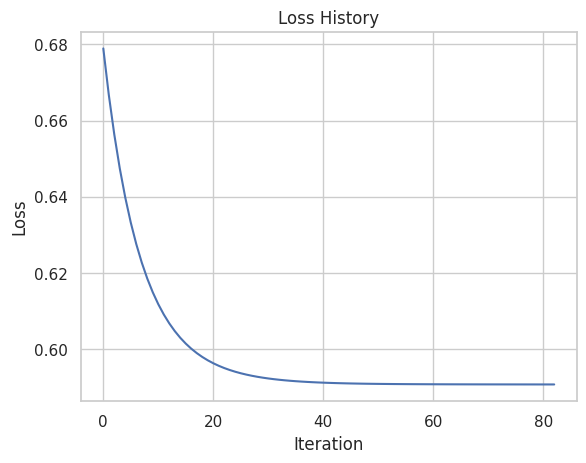

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 6]
Convergence at the 83th iteration


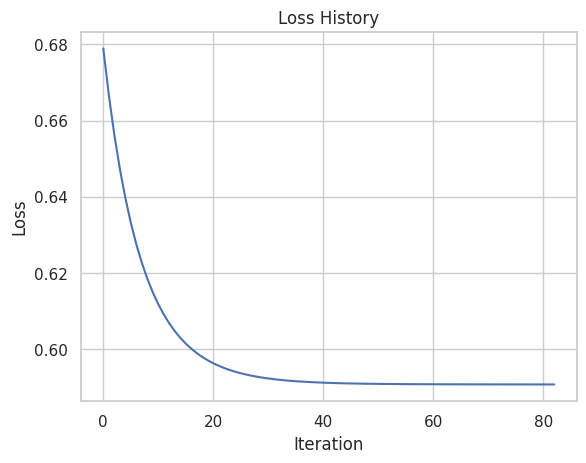

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 7]
Convergence at the 83th iteration


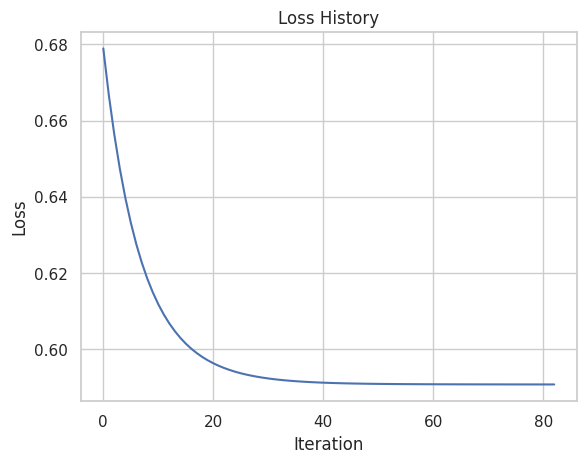

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 8]
Convergence at the 83th iteration


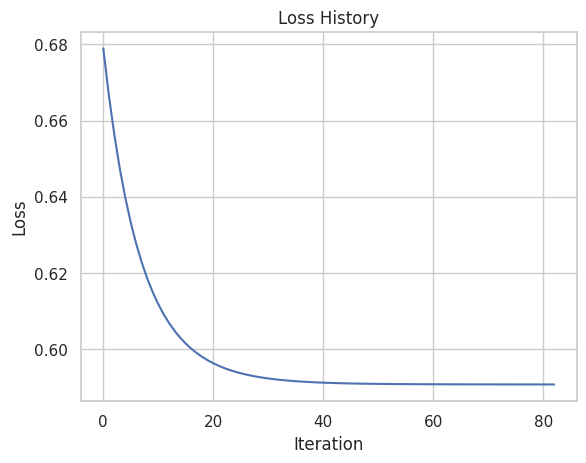

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 9]
Convergence at the 2962th iteration


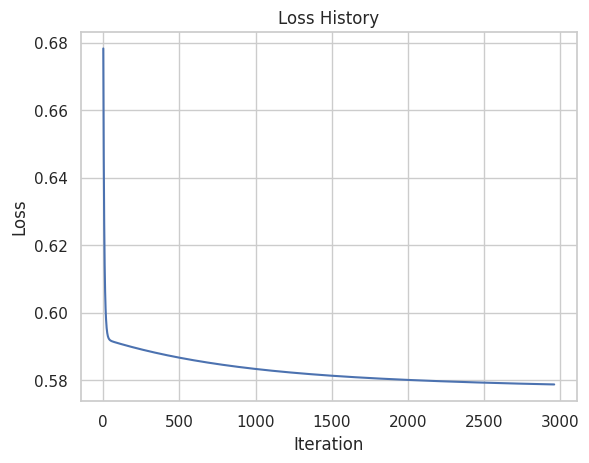

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 10]
Convergence at the 5395th iteration


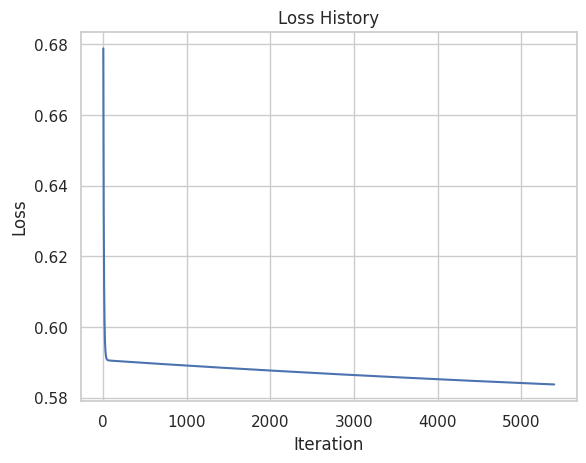

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
[0, 11]
Convergence at the 352th iteration


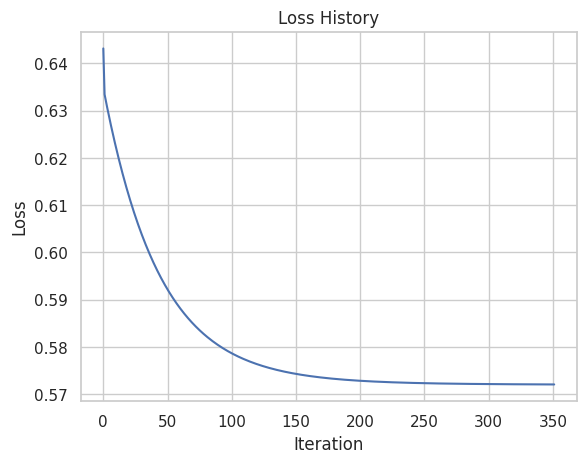

Confusion Matrix:
 TP: 0, TN: 41, FP: 0, FN: 9
Iteration 2: Added feature 1, ACC: 0.7567567567567568
Best test Accuaracy: 0.82
[0, 1, 2]


In [ ]:
selected_columns, bestAcc, bestTestAcc,TP, TN, FP, FN = forward_step()
print(len(selected_columns))
selected_columns_new=[]
# Final selected features
for i in range(len(selected_columns)):
  Best_features=cols[selected_columns[i]]
  selected_columns_new.append(Best_features)
  print(Best_features)
print(f"Best training accc: {bestAcc}")
print(f"Test accuracy using forward stepwise regression: {bestTestAcc}")

In [ ]:
def confusion_matrix(true_labels, predicted_labels):
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)

# accuracy formula
accuracy = (TP + TN) / (TP + TN + FN + FP)

# Prevent division by zero
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

precision_z = TN / (TN + FN) if (TN + FN) > 0 else 0.0
precision_o = TP / (TP + FP) if (TP + FP) > 0 else 0.0
rec_z = TN / (TN + FP) if (TN + FP) > 0 else 0.0
rec_o = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1_z = 2 * (precision_z * rec_z) / (precision_z + rec_z) if (precision_z + rec_z) > 0 else 0.0
f1_o = 2 * (precision_o * rec_o) / (precision_o + rec_o) if (precision_o + rec_o) > 0 else 0.0

# macro averages
macro_avg_precision = (precision_z + precision_o) / 2
macro_avg_recall = (rec_z + rec_o) / 2
macro_avg_f1 = (f1_z + f1_o) / 2

# weighted averages
total_samples = TP + TN + FP + FN
weighted_avg_precision = (precision_z * (TN + FP) + precision_o * (TP + FN)) / total_samples
weighted_avg_recall = (rec_z * (TN + FP) + rec_o * (TP + FN)) / total_samples
weighted_avg_f1 = (f1_z * (TN + FP) + f1_o * (TP + FN)) / total_samples

# Create classification report dataframe
class_rep = {
    'Metric': [
        'Precision_1', 'Recall_1', 'F1-Score_1',
        'Precision_0', 'Recall_0', 'F1-Score_0',
        'Accuracy', 'Macro Average Precision', 'Macro Average Recall',
        'Macro Average F1 Score', 'Weighted Average Precision',
        'Weighted Average Recall', 'Weighted Average F1'
    ],
    'Value': [round(x, 2) for x in [
        precision, recall, f1, precision_z, rec_z, f1_z, accuracy,
        macro_avg_precision, macro_avg_recall, macro_avg_f1,
        weighted_avg_precision, weighted_avg_recall, weighted_avg_f1
    ]]
}

class_rep_metric = pd.DataFrame(class_rep)
print("Classification Report for Logistic Regression Before Regularization and Feature Scaling")
print(class_rep_metric)


In [ ]:
print(len(selected_columns))

3.c.


In [ ]:
cols=['mean_radius', 'mean_texture']

In [ ]:
X=df[cols]
Y=df['outcome']
X.shape, Y.shape

X=X.to_numpy()
Y=Y.to_numpy()
print(X.shape, Y.shape)
print(X[0:10])

In [ ]:
leng=len(X)
index=np.arange(leng)
split=int(0.75*leng)
X_train=X[index[:split]]
X_test=X[index[split:]]

Y_train=Y[index[:split]]
Y_test=Y[index[split:]]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print("Xtrain:",X_train)
print("Ytrain",Y_train)
print("Xtest",X_test)
print("Ytest",Y_test)

In [ ]:
def costfunct(x, y, w, b):
    m = x.shape[0]
    cost = 0
    epsi = 1e-10  # Prevent log(0)
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigm = sigmoid(z)
        cost += -y[i] * np.log(sigm + epsi) - (1 - y[i]) * np.log(1 - sigm + epsi)
    return cost / m

def gradient_dj(x, y, w, b):
    m, n = x.shape
    dw = np.zeros(n)
    db = 0.0
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigm = sigmoid(z)
        error = sigm - y[i]  # Correct error calculation
        for j in range(n):
            dw[j] += error * x[i, j]
        db += error
    dw /= m
    db /= m
    return dw, db
def gradient_descent(x, y, gradient_dj, costfunct, iterators, learning_rate):
    tolerance = 1e-6
    prev_loss = float('inf')
    n = x.shape[1]
    w = np.zeros(n)
    b = 0.0
    loss_history=[]
    for i in range(iterators):
        dw, db = gradient_dj(x, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db

        loss = costfunct(x, y, w, b)
        loss_history.append(loss)
        if abs(prev_loss - loss) < tolerance:
            print(f"Convergence at the {i+1}th iteration")
            break
        prev_loss = loss

    #track loss history
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

    return w, b  # Move return outside the loop
def evaluate_accuracy(X, Y, w, b):
    z = np.dot(X, w) + b
    predictions = (sigmoid(z) >= 0.65).astype(int)  # Convert probabilities to binary (0 or 1)
    return np.mean(predictions == Y)  # Calculate accuracy
w, b = gradient_descent(X_train, Y_train, gradient_dj, costfunct, iterators=10000, learning_rate=0.001)
z = np.dot(X_test, w) + b
predict_y = sigmoid(z)
binary_predictions = (predict_y >= 0.65).astype(int)

print(binary_predictions)
print("Training set accuracy:",evaluate_accuracy(X_train, Y_train, w, b))
print("Test Accuracy for Logisic regression with 12 features: ", evaluate_accuracy(X_test, Y_test, w, b))

Both gives same accuracy both are good in terms of accuracy that is the metric used mainly for comaparison

4.	Experimenting with regularization and Cost function. (40 points)   
   
a)	Regularization and Feature Scaling: (20 points)   
I.	For the best performing model in Q.3 (Model from 3c), does regularization improve the performance? II. Does Feature Scaling improve the performance for the model in Q 3c?   


Selected model is Logistic regression model

In [ ]:
print(selected_columns_new)

1. Using regularization

In [ ]:
cols=['mean_radius', 'mean_texture',
      'mean_perimeter', 'mean_area',
      'mean_smoothness', 'mean_compactness',
      'mean_concavity', 'mean_concave_points',
      'mean_fractal_dimension', 'se_perimeter',
      'se_texture', 'se_area']

In [ ]:
X=df[cols]
Y=df['outcome']

X.shape, Y.shape

X=X.to_numpy()
Y=Y.to_numpy()
leng=len(X)
index=np.arange(leng)
split=int(0.75*leng)
X_train=X[index[:split]]
X_test=X[index[split:]]

# for i in range(X_train.shape[1]):
#   mean=np.mean(X_train[:, i])
#   std=np.std(X_train[:, i])
#   X_train[:, i]= (X_train[:, i]-mean)/std
#   X_test[:, i]= (X_test[:, i]-mean)/std


Y_train=Y[index[:split]]
Y_test=Y[index[split:]]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print("Xtrain:",X_train)
print("Ytrain",Y_train)
print("Xtest",X_test)
print("Ytest",Y_test)

In [ ]:
def costfunct_reg(x, y, w, b, lambda_val):
    m = x.shape[0]
    cost = 0
    epsi = 1e-10  # Prevent log(0)
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigm = sigmoid(z)
        cost += -y[i] * np.log(sigm + epsi) - (1 - y[i]) * np.log(1 - sigm + epsi)
    reg_term=(lambda_val/(2*m))*np.sum(w**2)
    return cost / m + reg_term

In [ ]:
def gradient_dj_reg(x, y, w, b, lambda_val):
    m, n = x.shape
    dw = np.zeros(n)
    db = 0.0
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigm = sigmoid(z)
        error = sigm - y[i]  # Correct error calculation
        for j in range(n):
            dw[j] += error * x[i, j]
        db += error
    dw /= m
    dw += (lambda_val/m)*w
    db /= m
    return dw, db

In [ ]:
def gradient_descent_reg(x, y, gradient_dj_reg, costfunct_reg, iterators, learning_rate, lambda_val):
    tolerance = 1e-6
    prev_loss = float('inf')
    n = x.shape[1]
    w = np.zeros(n)
    b = 0.0
    loss_history=[]
    for i in range(iterators):
        dw, db = gradient_dj_reg(x, y, w, b, lambda_val)
        w -= learning_rate * dw
        b -= learning_rate * db

        loss = costfunct_reg(x, y, w, b, lambda_val)
        loss_history.append(loss)
        if abs(prev_loss - loss) < tolerance:
            print(f"Convergence at the {i+1}th iteration")
            break
        prev_loss = loss

    #track loss history
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

    return w, b  # Move return outside the loop

In [ ]:
w, b = gradient_descent_reg(X_train, Y_train, gradient_dj_reg, costfunct_reg, iterators=10000, learning_rate=0.001, lambda_val=0.1)
z = np.dot(X_test, w) + b
predict_y = sigmoid(z)
binary_predictions = (predict_y >= 0.65).astype(int)

print(binary_predictions)
print("Test Accuracy: ", evaluate_accuracy(X_test, Y_test, w, b))

In [ ]:
def confusion_matrix(true_labels, predicted_labels):
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)
print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

accuracy = (TP + TN) / (TP + TN + FN + FP)

# Prevent division by zero
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

precision_z = TN / (TN + FN) if (TN + FN) > 0 else 0.0
precision_o = TP / (TP + FP) if (TP + FP) > 0 else 0.0
rec_z = TN / (TN + FP) if (TN + FP) > 0 else 0.0
rec_o = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1_z = 2 * (precision_z * rec_z) / (precision_z + rec_z) if (precision_z + rec_z) > 0 else 0.0
f1_o = 2 * (precision_o * rec_o) / (precision_o + rec_o) if (precision_o + rec_o) > 0 else 0.0

macro_avg_precision = (precision_z + precision_o) / 2
macro_avg_recall = (rec_z + rec_o) / 2
macro_avg_f1 = (f1_z + f1_o) / 2

total_samples = TP + TN + FP + FN
weighted_avg_precision = (precision_z * (TN + FP) + precision_o * (TP + FN)) / total_samples
weighted_avg_recall = (rec_z * (TN + FP) + rec_o * (TP + FN)) / total_samples
weighted_avg_f1 = (f1_z * (TN + FP) + f1_o * (TP + FN)) / total_samples

# Create classification report dataframe
class_rep = {
    'Metric': [
        'Precision_1', 'Recall_1', 'F1-Score_1',
        'Precision_0', 'Recall_0', 'F1-Score_0',
        'Accuracy', 'Macro Average Precision', 'Macro Average Recall',
        'Macro Average F1 Score', 'Weighted Average Precision',
        'Weighted Average Recall', 'Weighted Average F1'
    ],
    'Value': [round(x, 2) for x in [
        precision, recall, f1, precision_z, rec_z, f1_z, accuracy,
        macro_avg_precision, macro_avg_recall, macro_avg_f1,
        weighted_avg_precision, weighted_avg_recall, weighted_avg_f1
    ]]
}

class_rep_metric = pd.DataFrame(class_rep)
print("Classification Report for Logistic Regression after regularization")
print(class_rep_metric)


11. Using feature scaling

In [ ]:
X=df[cols]
Y=df['outcome']

X.shape, Y.shape

X=X.to_numpy()
Y=Y.to_numpy()
leng=len(X)
index=np.arange(leng)
split=int(0.75*leng)
X_train=X[index[:split]]
X_test=X[index[split:]]

for i in range(X_train.shape[1]):
  mean=np.mean(X_train[:, i])
  std=np.std(X_train[:, i])
  X_train[:, i]= (X_train[:, i]-mean)/std
  X_test[:, i]= (X_test[:, i]-mean)/std


Y_train=Y[index[:split]]
Y_test=Y[index[split:]]

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape
print("Xtrain:",X_train)
print("Ytrain",Y_train)
print("Xtest",X_test)
print("Ytest",Y_test)

In [ ]:
w, b = gradient_descent(X_train, Y_train, gradient_dj, costfunct, iterators=10000, learning_rate=0.1)
z = np.dot(X_test, w) + b
predict_y = sigmoid(z)
binary_predictions = (predict_y >= 0.65).astype(int)

print(binary_predictions)
print("Test Accuracy: ", evaluate_accuracy(X_test, Y_test, w, b))

In [ ]:
def confusion_matrix(true_labels, predicted_labels):
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)
print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
accuracy = (TP + TN) / (TP + TN + FN + FP)

# Prevent division by zero
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

precision_z = TN / (TN + FN) if (TN + FN) > 0 else 0.0
precision_o = TP / (TP + FP) if (TP + FP) > 0 else 0.0
rec_z = TN / (TN + FP) if (TN + FP) > 0 else 0.0
rec_o = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1_z = 2 * (precision_z * rec_z) / (precision_z + rec_z) if (precision_z + rec_z) > 0 else 0.0
f1_o = 2 * (precision_o * rec_o) / (precision_o + rec_o) if (precision_o + rec_o) > 0 else 0.0

macro_avg_precision = (precision_z + precision_o) / 2
macro_avg_recall = (rec_z + rec_o) / 2
macro_avg_f1 = (f1_z + f1_o) / 2

total_samples = TP + TN + FP + FN
weighted_avg_precision = (precision_z * (TN + FP) + precision_o * (TP + FN)) / total_samples
weighted_avg_recall = (rec_z * (TN + FP) + rec_o * (TP + FN)) / total_samples
weighted_avg_f1 = (f1_z * (TN + FP) + f1_o * (TP + FN)) / total_samples

# Create classification report dataframe
class_rep = {
    'Metric': [
        'Precision_1', 'Recall_1', 'F1-Score_1',
        'Precision_0', 'Recall_0', 'F1-Score_0',
        'Accuracy', 'Macro Average Precision', 'Macro Average Recall',
        'Macro Average F1 Score', 'Weighted Average Precision',
        'Weighted Average Recall', 'Weighted Average F1'
    ],
    'Value': [round(x, 2) for x in [
        precision, recall, f1, precision_z, rec_z, f1_z, accuracy,
        macro_avg_precision, macro_avg_recall, macro_avg_f1,
        weighted_avg_precision, weighted_avg_recall, weighted_avg_f1
    ]]
}

class_rep_metric = pd.DataFrame(class_rep)
print("Classification Report for Logistic Regression after Feature Scaling")
print(class_rep_metric)


Using both Methods

In [ ]:
X=df[cols]
Y=df['outcome']

X.shape, Y.shape

X=X.to_numpy()
Y=Y.to_numpy()
leng=len(X)
index=np.arange(leng)
split=int(0.75*leng)
X_train=X[index[:split]]
X_test=X[index[split:]]

for i in range(X_train.shape[1]):
  mean=np.mean(X_train[:, i])
  std=np.std(X_train[:, i])
  X_train[:, i]= (X_train[:, i]-mean)/std
  X_test[:, i]= (X_test[:, i]-mean)/std


Y_train=Y[index[:split]]
Y_test=Y[index[split:]]

print("Training shape: ", X_train.shape, Y_train.shape)
print(f"Test Shape: {X_test.shape} ,{Y_test.shape}")
print("Xtrain:",X_train)
print("Ytrain",Y_train)
print("Xtest",X_test)
print("Ytest",Y_test)

In [ ]:
w, b = gradient_descent_reg(X_train, Y_train, gradient_dj_reg, costfunct_reg, iterators=10000, learning_rate=0.001, lambda_val=0.1)
z = np.dot(X_test, w) + b
predict_y = sigmoid(z)
binary_predictions = (predict_y >= 0.65).astype(int)

print(binary_predictions)
print("Test Accuracy: ", evaluate_accuracy(X_test, Y_test, w, b))

In [ ]:
def confusion_matrix(true_labels, predicted_labels):
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)
print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
accuracy = (TP + TN) / (TP + TN + FN + FP)

# Prevent division by zero
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

precision_z = TN / (TN + FN) if (TN + FN) > 0 else 0.0
precision_o = TP / (TP + FP) if (TP + FP) > 0 else 0.0
rec_z = TN / (TN + FP) if (TN + FP) > 0 else 0.0
rec_o = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1_z = 2 * (precision_z * rec_z) / (precision_z + rec_z) if (precision_z + rec_z) > 0 else 0.0
f1_o = 2 * (precision_o * rec_o) / (precision_o + rec_o) if (precision_o + rec_o) > 0 else 0.0

macro_avg_precision = (precision_z + precision_o) / 2
macro_avg_recall = (rec_z + rec_o) / 2
macro_avg_f1 = (f1_z + f1_o) / 2

total_samples = TP + TN + FP + FN
weighted_avg_precision = (precision_z * (TN + FP) + precision_o * (TP + FN)) / total_samples
weighted_avg_recall = (rec_z * (TN + FP) + rec_o * (TP + FN)) / total_samples
weighted_avg_f1 = (f1_z * (TN + FP) + f1_o * (TP + FN)) / total_samples

class_rep = {
    'Metric': [
        'Precision_1', 'Recall_1', 'F1-Score_1',
        'Precision_0', 'Recall_0', 'F1-Score_0',
        'Accuracy', 'Macro Average Precision', 'Macro Average Recall',
        'Macro Average F1 Score', 'Weighted Average Precision',
        'Weighted Average Recall', 'Weighted Average F1'
    ],
    'Value': [round(x, 2) for x in [
        precision, recall, f1, precision_z, rec_z, f1_z, accuracy,
        macro_avg_precision, macro_avg_recall, macro_avg_f1,
        weighted_avg_precision, weighted_avg_recall, weighted_avg_f1
    ]]
}

class_rep_metric = pd.DataFrame(class_rep)
print("Classification Report for Logistic Regression after Feature Scaling")
print(class_rep_metric)


In [ ]:
# def forward_step():
#   selected_columns = []  # Start with an empty list of selected features
#   remaining_features = list(range(X_train.shape[1]))  # List of all feature indices
#   current_acc=-float('inf')
#   # n=X_train.shape[1]
#   # Stepwise regression
#   for i in range(X_train.shape[1]):
#       best_acc = current_acc
#       best_feature = None
#       best_w, best_b = None, None

#       # Try adding each remaining feature
#       for feature in remaining_features:
#           new_features = selected_columns + [feature]  # Add current feature to selected features
#           print(new_features)
#           model = X_train[:, new_features]  # Select the columns for the current model



#           w,b = gradient_descent(model, Y_train, gradient_dj, costfunct, iterators=10000, learning_rate=0.001, lambda_val=0.1)

#           X_subset = X_train[:, new_features]
#           model_test=X_test[:, new_features]
#           acc = evaluate_accuracy(X_subset, Y_train, w, b)
#           acc_test=evaluate_accuracy(model_test, Y_test, w, b)

#           z=np.dot(model_test, w)+b
#           predict_y=sigmoid(z)
#           binary_predictions=(predict_y>=0.65).astype(int)
#           conf_mat=confusion_matrix(Y_test, binary_predictions)
#           print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

#           # Keep the best feature based on ACC
#           if acc > best_acc:
#               best_acc = acc
#               best_test_acc=acc_test
#               best_feature = feature
#               best_model = model
#               best_w, best_b = w,b

#       # If ACC improves, add the feature and update remaining features
#       if best_feature is not None:
#           selected_columns.append(best_feature)  # Add the best feature to selected
#           remaining_features.remove(best_feature)  # Remove the best feature from remaining
#           current_acc = best_acc
#           print(f"Iteration {i+1}: Added feature {best_feature}, ACC: {best_acc}")
#           print(f"Best test Accuaracy: {best_test_acc}")
#       else:
#           print(f"ACC value obtained: {acc} which is smaller than the best Acc obtained before so the loop stoped")
#           break


#   return selected_columns, best_acc, best_test_acc, TP, TN, FP, FN


In [ ]:
# selected_columns, bestAcc, bestTestAcc,TP, TN, FP, FN = forward_step()
# print(len(selected_columns))
# selected_columns_new=[]
# # Final selected features
# for i in range(len(selected_columns)):
#   Best_features=cols[selected_columns[i]]
#   selected_columns_new.append(Best_features)
#   print(Best_features)
# print(f"Best accc: {bestAcc}")
# print(f"Best Test acc: {bestTestAcc}")

In [127]:
# def confusion_matrix(true_labels, predicted_labels):
#     TP = np.sum((true_labels == 1) & (predicted_labels == 1))
#     TN = np.sum((true_labels == 0) & (predicted_labels == 0))
#     FP = np.sum((true_labels == 0) & (predicted_labels == 1))
#     FN = np.sum((true_labels == 1) & (predicted_labels == 0))
#     return TP, TN, FP, FN

# TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)
# print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
# # Fix accuracy formula
# accuracy = (TP + TN) / (TP + TN + FN + FP)

# # Prevent division by zero
# precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
# recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
# f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# precision_z = TN / (TN + FN) if (TN + FN) > 0 else 0.0
# precision_o = TP / (TP + FP) if (TP + FP) > 0 else 0.0
# rec_z = TN / (TN + FP) if (TN + FP) > 0 else 0.0
# rec_o = TP / (TP + FN) if (TP + FN) > 0 else 0.0
# f1_z = 2 * (precision_z * rec_z) / (precision_z + rec_z) if (precision_z + rec_z) > 0 else 0.0
# f1_o = 2 * (precision_o * rec_o) / (precision_o + rec_o) if (precision_o + rec_o) > 0 else 0.0

# # Fix macro averages
# macro_avg_precision = (precision_z + precision_o) / 2
# macro_avg_recall = (rec_z + rec_o) / 2
# macro_avg_f1 = (f1_z + f1_o) / 2

# # Fix weighted averages
# total_samples = TP + TN + FP + FN
# weighted_avg_precision = (precision_z * (TN + FP) + precision_o * (TP + FN)) / total_samples
# weighted_avg_recall = (rec_z * (TN + FP) + rec_o * (TP + FN)) / total_samples
# weighted_avg_f1 = (f1_z * (TN + FP) + f1_o * (TP + FN)) / total_samples

# # Create classification report dataframe
# class_rep = {
#     'Metric': [
#         'Precision_1', 'Recall_1', 'F1-Score_1',
#         'Precision_0', 'Recall_0', 'F1-Score_0',
#         'Accuracy', 'Macro Average Precision', 'Macro Average Recall',
#         'Macro Average F1 Score', 'Weighted Average Precision',
#         'Weighted Average Recall', 'Weighted Average F1'
#     ],
#     'Value': [round(x, 2) for x in [
#         precision, recall, f1, precision_z, rec_z, f1_z, accuracy,
#         macro_avg_precision, macro_avg_recall, macro_avg_f1,
#         weighted_avg_precision, weighted_avg_recall, weighted_avg_f1
#     ]]
# }

# class_rep_metric = pd.DataFrame(class_rep)
# print("Classification Report for Logistic Regression Before Regularization and Feature Scaling")
# print(class_rep_metric)


Using different cost function

In [128]:
X=df[cols]
Y=df['outcome']
X.shape, Y.shape

X=X.to_numpy()
Y=Y.to_numpy()
print(X.shape, Y.shape)
print(X[0:10])
leng=len(X)
index=np.arange(leng)
split=int(0.75*leng)
for i in range(X_train.shape[1]):
  mean=np.mean(X_train[:, i])
  std=np.std(X_train[:, i])
  X_train[:, i]= (X_train[:, i]-mean)/std
  X_test[:, i]= (X_test[:, i]-mean)/std

X_test=X[index[split:]]
Y_test=Y[index[split:]]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(198, 12) (198,)
[[1.802e+01 2.760e+01 1.175e+02 1.013e+03 9.489e-02 1.036e-01 1.086e-01
  7.055e-02 6.333e-02 3.972e+00 1.890e+00 7.155e+01]
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 7.871e-02 8.589e+00 9.053e-01 1.534e+02]
 [2.137e+01 1.744e+01 1.375e+02 1.373e+03 8.836e-02 1.189e-01 1.255e-01
  8.180e-02 6.010e-02 3.928e+00 6.105e-01 8.215e+01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 9.744e-02 3.445e+00 1.156e+00 2.723e+01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
  1.043e-01 5.883e-02 5.438e+00 7.813e-01 9.444e+01]
 [1.275e+01 0.000e+00 8.460e+01 5.027e+02 1.189e-01 1.569e-01 1.664e-01
  7.666e-02 7.164e-02 2.999e+00 7.402e-01 3.085e+01]
 [1.898e+01 1.961e+01 1.244e+02 1.112e+03 9.087e-02 1.237e-01 1.213e-01
  8.910e-02 5.767e-02 3.592e+00 8.434e-01 6.121e+01]
 [1.371e+01 2.083e+01 9.020e+01 5.779e+02 1.189e-01 1.645e-01 9.366e-02
  5.985e-02 7.451e-02 3.856e+00 1.37

In [129]:
def costfunct(x, y, w, b, lambda_val):
    m = x.shape[0]
    cost = 0
    epsi = 1e-10  # Prevent log(0)
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigm = sigmoid(z)
        cost += (sigm-y[i])**2
        reg_term=(lambda_val/(2*m))*np.sum(w**2)
    return cost / (2*m)+reg_term

In [130]:
def gradient_dj(x, y, w, b, lambda_val):
    m, n = x.shape
    dw = np.zeros(n)
    db = 0.0
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigm = sigmoid(z)
        error = sigm - y[i]
        for j in range(n):
            dw[j] += error * x[i, j]
        db += error
    dw /= m +(lambda_val/m)*w
    db /= m
    return dw, db

In [131]:
def gradient_descent(x, y, gradient_dj, costfunct, iterators, learning_rate, lambda_val):
    tolerance = 1e-6
    prev_loss = float('inf')
    n = x.shape[1]
    w = np.zeros(n)
    b = 0.0
    loss_history=[]
    for i in range(iterators):
        dw, db = gradient_dj(x, y, w, b, lambda_val)
        w -= learning_rate * dw
        b -= learning_rate * db

        loss = costfunct(x, y, w, b, lambda_val)
        loss_history.append(loss)
        if abs(prev_loss - loss) < tolerance:
            print(f"Convergence at the {i+1}th iteration")
            break
        prev_loss = loss

    #track loss history
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

    return w, b

Convergence at the 11269th iteration


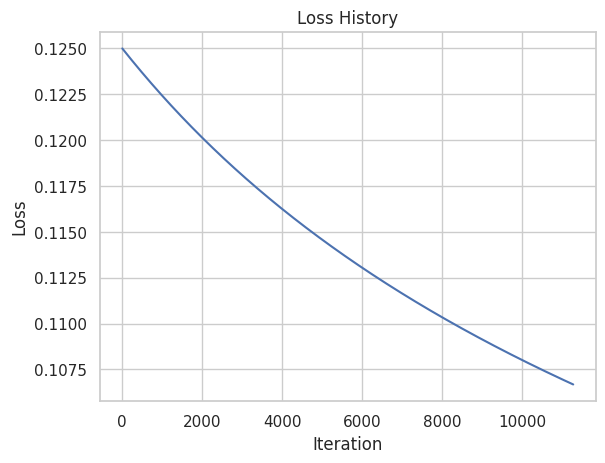

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [132]:
w, b = gradient_descent(X_train, Y_train, gradient_dj, costfunct, iterators=100000, learning_rate=0.0001, lambda_val=0.1)
z = np.dot(X_test, w) + b
predict_y = sigmoid(z)
binary_predictions = (predict_y >= 0.65).astype(int)

print(binary_predictions)

In [137]:
def confusion_matrix(true_labels, predicted_labels):
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)

accuracy = (TP + TN) / (TP + TN + FN + FP)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

precision_z = TN / (TN + FN) if (TN + FN) > 0 else 0.0
precision_o = TP / (TP + FP) if (TP + FP) > 0 else 0.0
rec_z = TN / (TN + FP) if (TN + FP) > 0 else 0.0
rec_o = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1_z = 2 * (precision_z * rec_z) / (precision_z + rec_z) if (precision_z + rec_z) > 0 else 0.0
f1_o = 2 * (precision_o * rec_o) / (precision_o + rec_o) if (precision_o + rec_o) > 0 else 0.0

macro_avg_precision = (precision_z + precision_o) / 2
macro_avg_recall = (rec_z + rec_o) / 2
macro_avg_f1 = (f1_z + f1_o) / 2

total_samples = TP + TN + FP + FN
weighted_avg_precision = (precision_z * (TN + FP) + precision_o * (TP + FN)) / total_samples
weighted_avg_recall = (rec_z * (TN + FP) + rec_o * (TP + FN)) / total_samples
weighted_avg_f1 = (f1_z * (TN + FP) + f1_o * (TP + FN)) / total_samples

class_rep = {
    'Metric': [
        'Precision_1', 'Recall_1', 'F1-Score_1',
        'Precision_0', 'Recall_0', 'F1-Score_0',
        'Accuracy', 'Macro Average Precision', 'Macro Average Recall',
        'Macro Average F1 Score', 'Weighted Average Precision',
        'Weighted Average Recall', 'Weighted Average F1'
    ],
    'Value': [round(x, 2) for x in [
        precision, recall, f1, precision_z, rec_z, f1_z, accuracy,
        macro_avg_precision, macro_avg_recall, macro_avg_f1,
        weighted_avg_precision, weighted_avg_recall, weighted_avg_f1
    ]]
}

class_rep_metric = pd.DataFrame(class_rep)
print("Classification Report for Logistic Regression after Regularization and Feature Scaling")
print(class_rep_metric)


Classification Report for Logistic Regression after Regularization and Feature Scaling
                        Metric  Value
0                  Precision_1   0.18
1                     Recall_1   1.00
2                   F1-Score_1   0.31
3                  Precision_0   0.00
4                     Recall_0   0.00
5                   F1-Score_0   0.00
6                     Accuracy   0.18
7      Macro Average Precision   0.09
8         Macro Average Recall   0.50
9       Macro Average F1 Score   0.15
10  Weighted Average Precision   0.03
11     Weighted Average Recall   0.18
12         Weighted Average F1   0.05


Using the Mean squared error performed really worse in terms of accuracy. This is due to the Non convex nature of MSE which means there might be more than one local minima found when it is used. This makes the gradient descent to not converge properly leading to incorrect accuracies.

In [ ]:
# def forward_step():
#   selected_columns = []  # Start with an empty list of selected features
#   remaining_features = list(range(X_train.shape[1]))  # List of all feature indices
#   current_acc=-float('inf')
#   # n=X_train.shape[1]
#   # Stepwise regression
#   for i in range(X_train.shape[1]):
#       best_acc = current_acc
#       best_feature = None
#       best_w, best_b = None, None

#       # Try adding each remaining feature
#       for feature in remaining_features:
#           new_features = selected_columns + [feature]  # Add current feature to selected features
#           print(new_features)
#           model = X_train[:, new_features]  # Select the columns for the current model



#           w,b = gradient_descent(model, Y_train, gradient_dj, costfunct, iterators=10000, learning_rate=0.001, lambda_val=0.1)

#           X_subset = X_train[:, new_features]
#           model_test=X_test[:, new_features]
#           acc = evaluate_accuracy(X_subset, Y_train, w, b)
#           acc_test=evaluate_accuracy(model_test, Y_test, w, b)

#           z=np.dot(model_test, w)+b
#           predict_y=sigmoid(z)
#           binary_predictions=(predict_y>=0.65).astype(int)
#           conf_mat=confusion_matrix(Y_test, binary_predictions)
#           print(f"Confusion Matrix:\n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

#           # Keep the best feature based on ACC
#           if acc > best_acc:
#               best_acc = acc
#               best_test_acc=acc_test
#               best_feature = feature
#               best_model = model
#               best_w, best_b = w,b

#       # If ACC improves, add the feature and update remaining features
#       if best_feature is not None:
#           selected_columns.append(best_feature)  # Add the best feature to selected
#           remaining_features.remove(best_feature)  # Remove the best feature from remaining
#           current_acc = best_acc
#           print(f"Iteration {i+1}: Added feature {best_feature}, ACC: {best_acc}")
#           print(f"Best test Accuaracy: {best_test_acc}")
#       else:
#           print(f"ACC value obtained: {acc} which is smaller than the best Acc obtained before so the loop stoped")
#           break


#   return selected_columns, best_acc, best_test_acc, TP, TN, FP, FN


In [ ]:
# selected_columns, bestAcc, bestTestAcc,TP, TN, FP, FN = forward_step()
# print(len(selected_columns))
# selected_columns_new=[]
# # Final selected features
# for i in range(len(selected_columns)):
#   Best_features=cols[selected_columns[i]]
#   selected_columns_new.append(Best_features)
#   print(Best_features)
# print(f"Best accc: {bestAcc}")
# print(f"Best Test acc: {bestTestAcc}")

In [136]:
# def confusion_matrix(true_labels, predicted_labels):
#     TP = np.sum((true_labels == 1) & (predicted_labels == 1))
#     TN = np.sum((true_labels == 0) & (predicted_labels == 0))
#     FP = np.sum((true_labels == 0) & (predicted_labels == 1))
#     FN = np.sum((true_labels == 1) & (predicted_labels == 0))
#     return TP, TN, FP, FN

# TP, TN, FP, FN = confusion_matrix(Y_test, binary_predictions)

# # Fix accuracy formula
# accuracy = (TP + TN) / (TP + TN + FN + FP)

# # Prevent division by zero
# precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
# recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
# f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# precision_z = TN / (TN + FN) if (TN + FN) > 0 else 0.0
# precision_o = TP / (TP + FP) if (TP + FP) > 0 else 0.0
# rec_z = TN / (TN + FP) if (TN + FP) > 0 else 0.0
# rec_o = TP / (TP + FN) if (TP + FN) > 0 else 0.0
# f1_z = 2 * (precision_z * rec_z) / (precision_z + rec_z) if (precision_z + rec_z) > 0 else 0.0
# f1_o = 2 * (precision_o * rec_o) / (precision_o + rec_o) if (precision_o + rec_o) > 0 else 0.0

# # Fix macro averages
# macro_avg_precision = (precision_z + precision_o) / 2
# macro_avg_recall = (rec_z + rec_o) / 2
# macro_avg_f1 = (f1_z + f1_o) / 2

# # Fix weighted averages
# total_samples = TP + TN + FP + FN
# weighted_avg_precision = (precision_z * (TN + FP) + precision_o * (TP + FN)) / total_samples
# weighted_avg_recall = (rec_z * (TN + FP) + rec_o * (TP + FN)) / total_samples
# weighted_avg_f1 = (f1_z * (TN + FP) + f1_o * (TP + FN)) / total_samples

# # Create classification report dataframe
# class_rep = {
#     'Metric': [
#         'Precision_1', 'Recall_1', 'F1-Score_1',
#         'Precision_0', 'Recall_0', 'F1-Score_0',
#         'Accuracy', 'Macro Average Precision', 'Macro Average Recall',
#         'Macro Average F1 Score', 'Weighted Average Precision',
#         'Weighted Average Recall', 'Weighted Average F1'
#     ],
#     'Value': [round(x, 2) for x in [
#         precision, recall, f1, precision_z, rec_z, f1_z, accuracy,
#         macro_avg_precision, macro_avg_recall, macro_avg_f1,
#         weighted_avg_precision, weighted_avg_recall, weighted_avg_f1
#     ]]
# }

# class_rep_metric = pd.DataFrame(class_rep)
# print("Classification Report for Logistic Regression after Regularization and Feature Scaling")
# print(class_rep_metric)
